## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Project: Concrete Strength Prediction
<a id='shape'></a>

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 85% to 95% accuracy.mode

###  Load the libraries:

In [343]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

###  Import data files as data frames: 

In [344]:
Concrete_Data = pd.read_csv("concrete.csv")

In [345]:
Concrete_Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Data Quality Checks:

**Check for null values**

In [346]:
Concrete_Data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values in the dataset.

**Check the Dimension of data**

In [347]:
Concrete_Data.shape

(1030, 9)

In [348]:
Concrete_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are 1030 Observations of data input / rows and 9 data fields attributes / columns. All of the variables are quantitive.  Seven of the variables are weights in kg of components of a mixture.  

**Check the data.describe()**

In [349]:
Concrete_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Exploratory Data Analytics (EDA) 

## EXPLORATORY DATA ANALYTICS (EDA)

Let us have a closer look at some of the features:
- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable


**Age**

Concrete hardens with time and strength increases. Usually, concrete is tested after 28 days.

**Fly ash and slag**

Both features can be considered as binder together with cement. Both increase strength and durability of concrete. However, the hardening process takes longer and therefore it requires more time to reach full compressive strength.

**Superplasticizer**

Superplasticizer are used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.



## Univariate Analysis:
Display univariate plots of the attributes: 'cement', 'slag','Ash', 'water', 'superplastic', 'coarsagg', 'fineagg', and 'strength', from the respective Conrete Data set

In [350]:
EDA_Columns = list(Concrete_Data)
print(EDA_Columns)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']


**Histogram plots for important independent numeric variables**

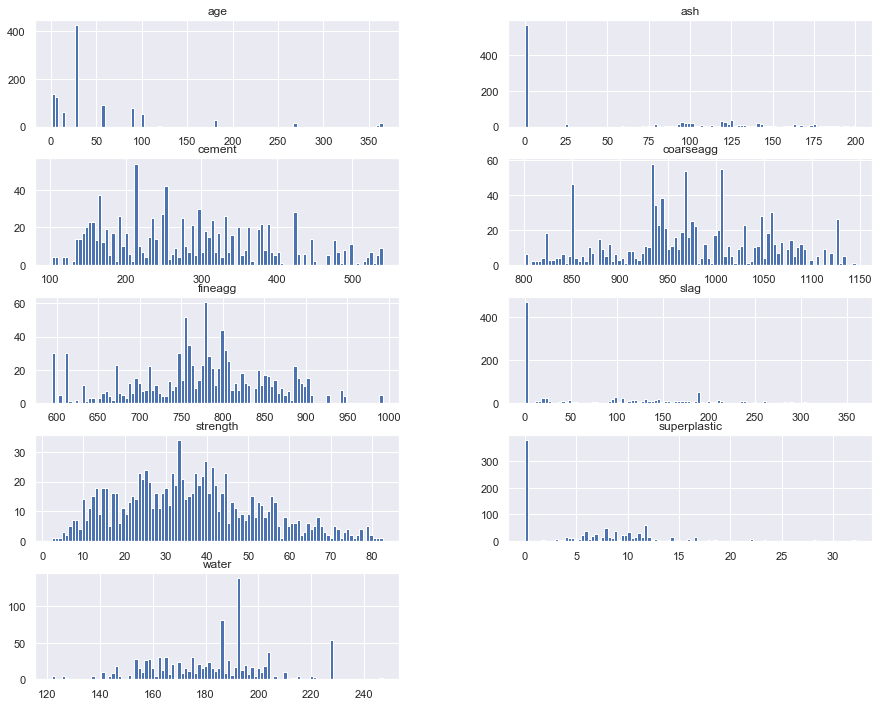

In [351]:
Concrete_Data[EDA_Columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2)); 
# Histogram of the numeric data columns

**Analysis Age (cured age of the concrete mixture in days)**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


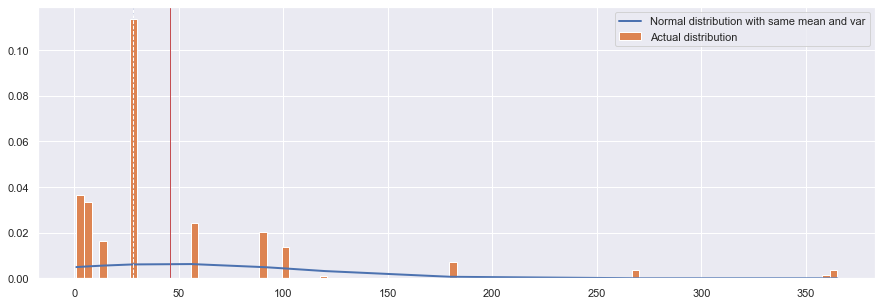

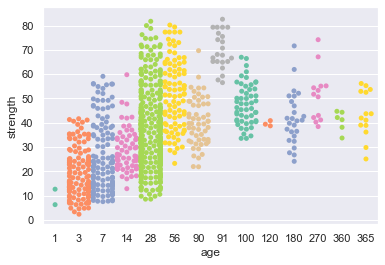

In [352]:
r = np.asarray(Concrete_Data['age'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['age'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['age'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the cured age of the concrete mixture in days 'Age' data attribute:**

Some features of the Concrete mixture age properties include: 
- Mean Age (days): 45.66
- Minimum Cement Mixture Age (days): 1
- Maximum Age (days): 365 

The age histogram shows most tests are taken from samples that have cured for 50 days or less. Very few samples were tested that were over 100 days old, thus may indicate potential outliers.

The age variable ranges from 1 to 365 in days, so these samples vary in cure time with the median cure time at 28 days and a maximum of 365 days or 1 year. That's a pretty big range, considering concrete that is only a few days old won't be expected to harden very much. This also may indicate instance of data capturer errors or outliers to be handeled.

The median of 28 days appears to be sweet spot for the ideal cured age of a concrete mixture for strength output. 

**Analysis Fly Ash (ash)**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


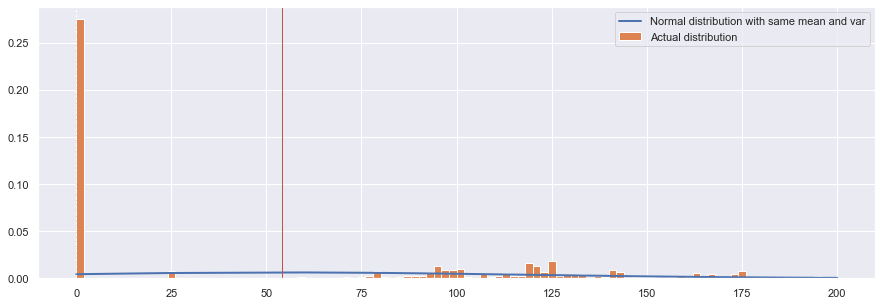

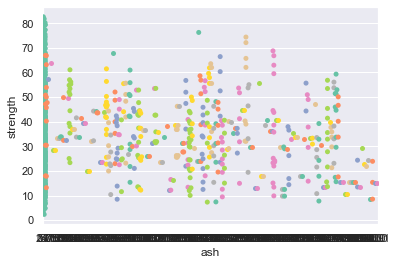

In [353]:
r = np.asarray(Concrete_Data['ash'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['ash'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['ash'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['ash'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['ash'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition 'Fly Ash (ash)'(kg) data attribute:**

Some features of the fly ash composition in the concrete data observations include: 
- Mean fly ash composition: 54.18
- Minimum fly ash composition: 0
- Maximum fly ash composition: 200.1 

From the above analysis we notice an interesting observation that slag, 'fly ash', and plasticizer aren't present in all of the samples. Interestingly, 'fly ash' has a median of zero, so most of the samples don't have any fly ash.

Flyash is not present in many of the samples, but like slag, many of the samples that do have it are in the 0.5 - 1kg per kg of cement range.  With a lot of zeros the distribution looks similar to slag. 

**Univariate Analysis cement**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


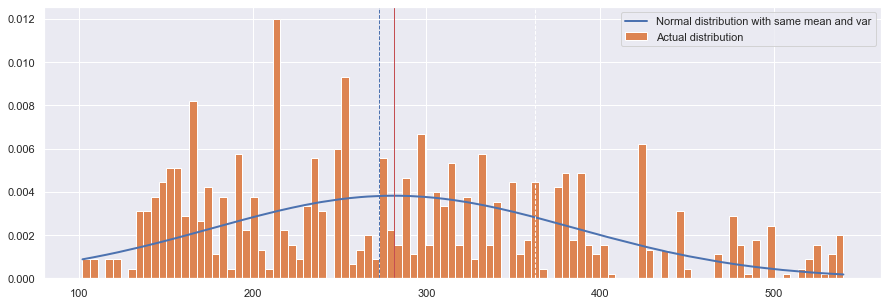

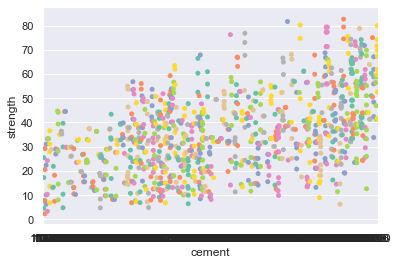

In [425]:
r = np.asarray(Concrete_Data['cement'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['cement'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['cement'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['cement'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['cement'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'cement' data attribute:**

Some features of the 'cement' in the concrete data include: 

- Mean: 40.94
- Minimum: 18
- Maximum: 95

There appears to be a negative correlation between cement and strength that we must explore in more detail. 

**Analysis Blast Furnace Slag** 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


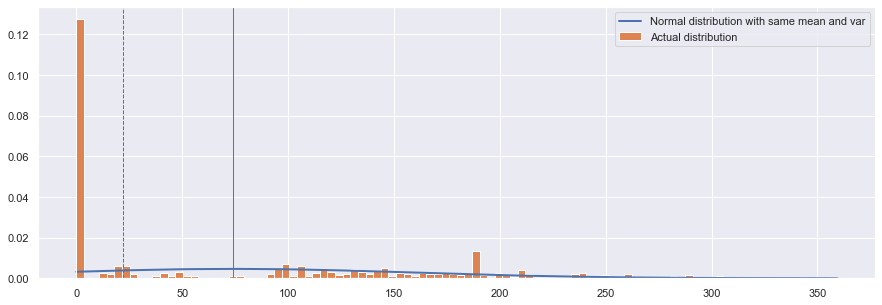

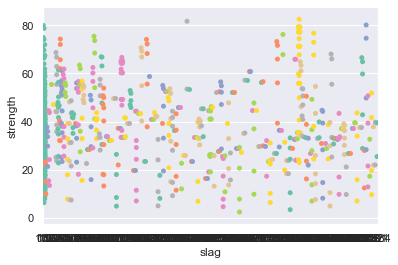

In [355]:
r = np.asarray(Concrete_Data['slag'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['slag'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['slag'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['slag'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['slag'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'Blast Furnace Slag' data attribute:**

Some features of the 'Blast Furnace Slag' in the concrete data include: 
- Mean Slag: 73.895825
- Minimum Slag: 0
- Maximum Slag: 359

Slag is not always present, but it looks like many of the samples are in the 0.5 - 1.5kg per kg of cement range.  Because of the large number of zero values, I'm not sure the non-zero ones on the low-end are outliers, though. It's just that a lot of samples don't have any slag.

**Analysis Coarse Aggregate (coarseagg)**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


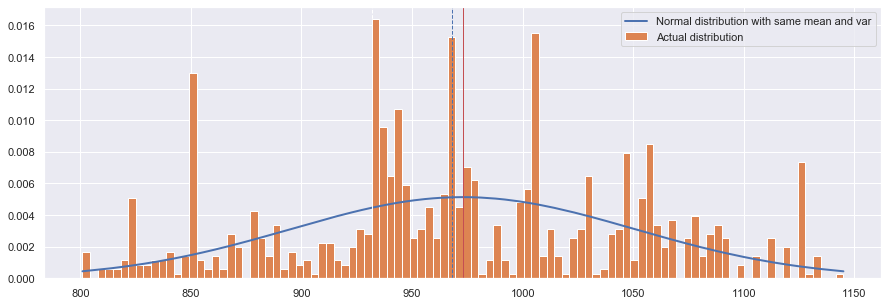

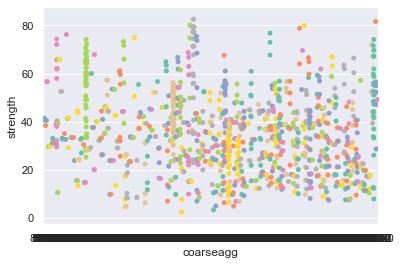

In [356]:
r = np.asarray(Concrete_Data['coarseagg'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['coarseagg'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['coarseagg'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['coarseagg'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['coarseagg'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'Coarse Aggregate (coarseagg)' data attribute:**

Some features of the 'coarse Aggregate (coarseagg)' in the concrete data include:
- Mean (coarseagg): 972.91
- Minimum (coarseagg): 801
- Maximum (coarseagg): 992.6

The amount of coarse aggregate also appears to be somewhat normally distributed.  It's also present in instance of the concrete mixture in the sample.

**Analysis water**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


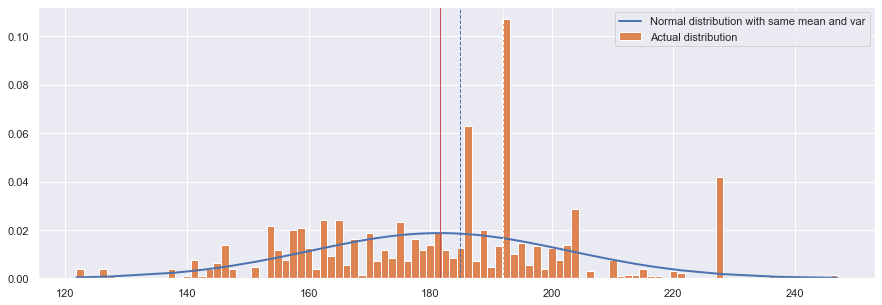

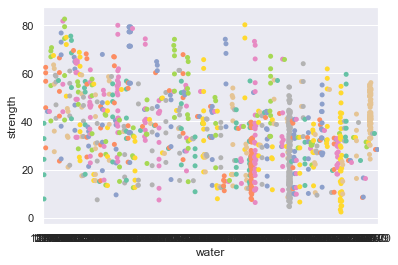

In [357]:
r = np.asarray(Concrete_Data['water'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['water'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['water'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['water'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['water'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'Water' data attribute:**

Some features of the 'Water' in the concrete data include:
- Mean Age: 181.567282
- Minimum Customer Age: 121.8
- Maximum Customer Age: 227 

From the above analysis we note Water looks a little left skewed, and there are a few outliers. 

**Analysis fineagg**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


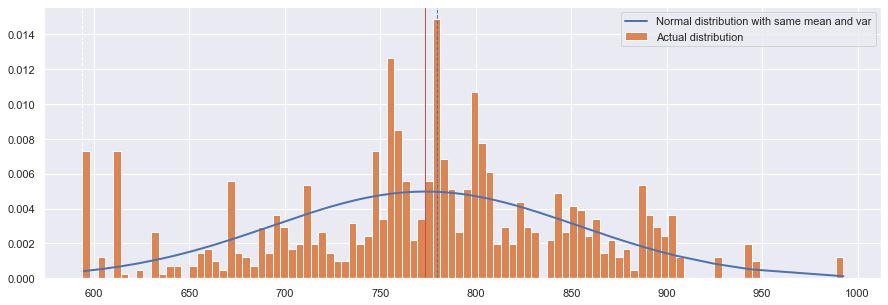

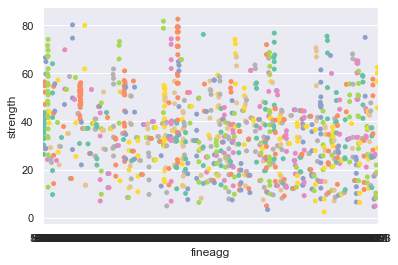

In [358]:
r = np.asarray(Concrete_Data['fineagg'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['fineagg'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['fineagg'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['fineagg'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['fineagg'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'Fine Aggregate (fineagg)' data attribute:**

Some features of the 'Fine Aggregate (fineagg)' in the concrete data include:
- Mean (fineagg): 773.58
- Minimum (fineagg) Age: 594
- Maximum (fineagg) Age: 992 

The amount of fine aggregate appears to be somewhat normally distributed. Unlike some of the additives fine aggregate is present in every sample.

**Analysis superplastic**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


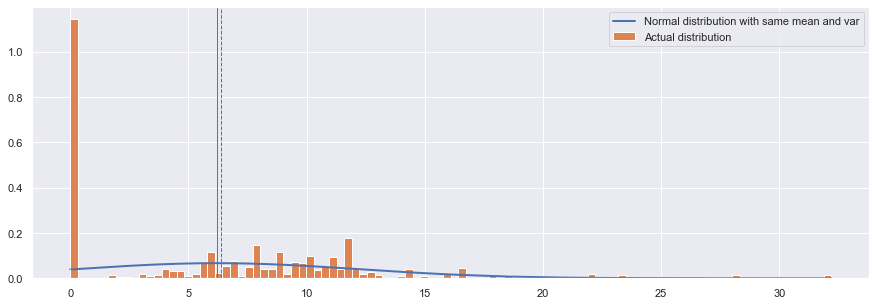

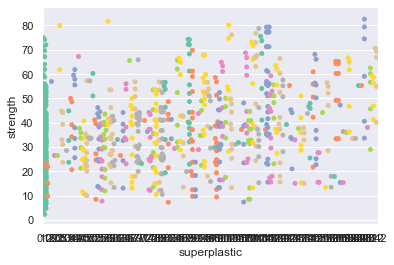

In [359]:
r = np.asarray(Concrete_Data['superplastic'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['superplastic'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['superplastic'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['superplastic'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['superplastic'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'Superplastic' data attribute:**

Some features of the 'Superplastic' in the concrete data include:
- Mean: 6.2
- Minimum: 0
- Maximum: 32.2 

Many samples don't contain superplastic, but there is a grouping of samples that do form a skewed distribution with a few outliers.

**Analysis Slag**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


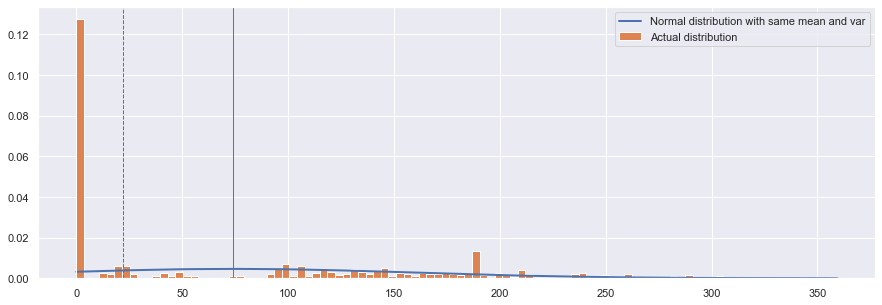

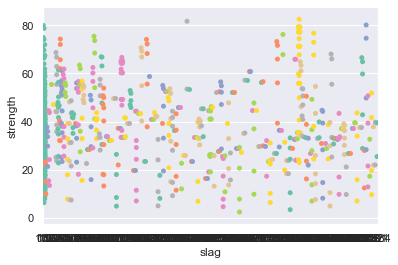

In [360]:
r = np.asarray(Concrete_Data['slag'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['slag'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['slag'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['slag'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

sns.swarmplot(Concrete_Data['slag'] ,Concrete_Data['strength'],  palette='Set2')

**Analysis Concrete Data for the composition of 'Slag' data attribute:**

Some features of the 'Slag' in the concrete data include:
- Mean: 73.895825
- Minimum: 0
- Maximum: 359

Many samples don't contain slag, but there is an extreme range in the composition of slag in the data set which may indicate a few outliers.

**Univariate Analysis strength**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


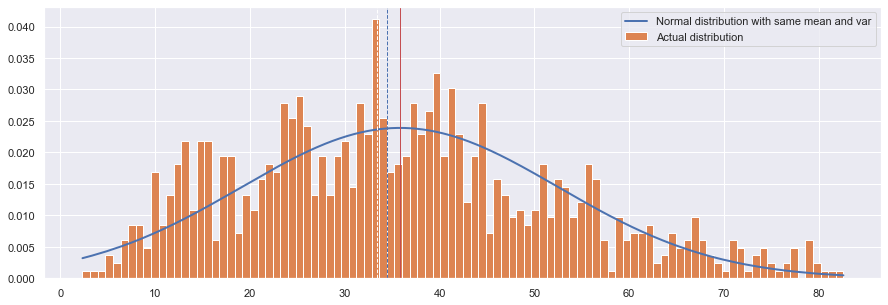

In [361]:
r = np.asarray(Concrete_Data['strength'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Concrete_Data['strength'].mean(), color='r', linewidth=1)
plt.axvline(Concrete_Data['strength'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Concrete_Data['strength'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

**Analysis Concrete Data for the 'strength' data attribute:**

Some features of the Concrete 'Strenth' target variable include: 
- Mean: 35.8
- Minimum: 2.33
- Maximum: 82.6 

The concrete strength of the data observations are mostly normally distributed, with most samples being in the 50 MPa range, with the strongest samples in the 60-90 MPa range. However it's slightly right-skewed.

**Overall Interesting Analysis from Exploratory Data Analytics procedures on Concrete Data:**

From the univariate Exploratory Data Analytics procedures above we note that a number of the components are showing that they have zero presence in a lot of the observations.  These must be optional additives, as water, cement, and aggregates are always ingredients. Below we will see how many samples omit additives such as slag, plasticizer, and flyash.

In [362]:
Concrete_Data.isin([0]).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

Of the 1030 samples more than half (54.95%) don't contain flyash, and one third to one half of the data observations are missing either superplastic (36.8%) or slag (45.73%).

## Bivariate Analysis

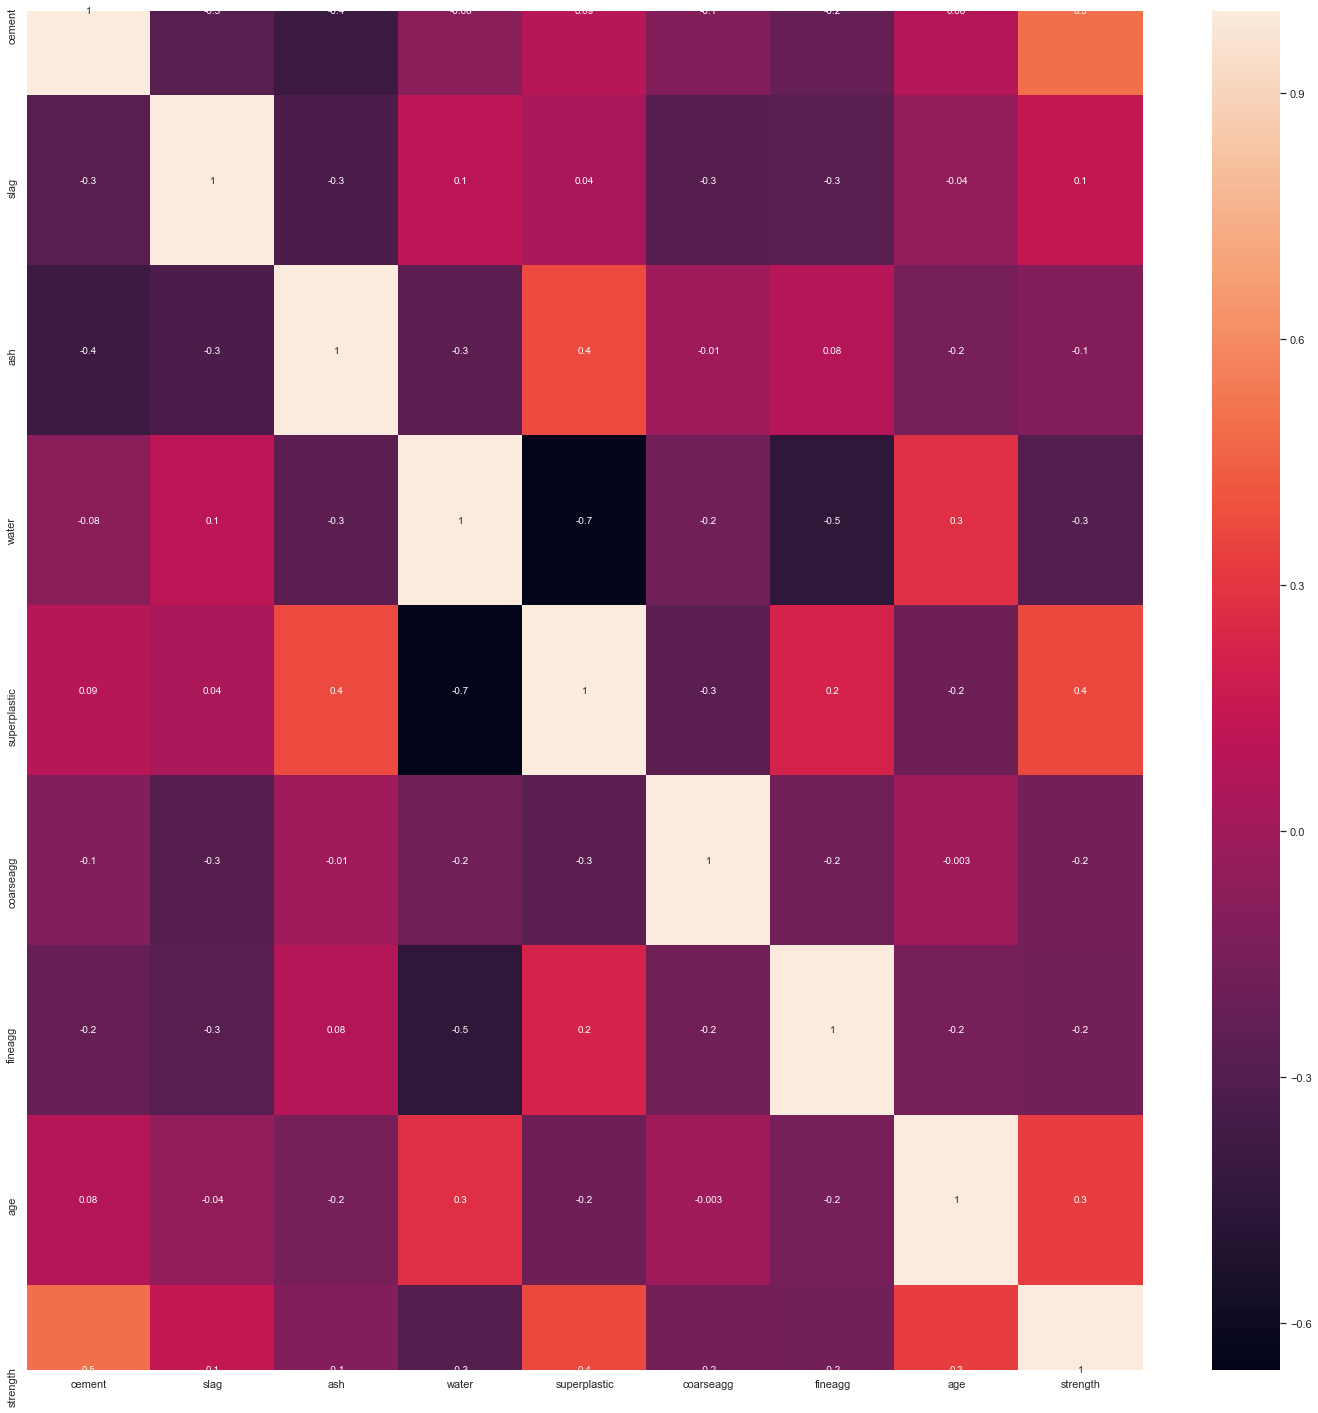

In [363]:
plt.figure(figsize=(25,25))
sns.heatmap(Concrete_Data.corr(), annot = True, fmt='.1g')

It is evident that cement and age, superplastic have good positive correlation with strength. cement and water both being strong predictors have a clear negative correlation with Strength. 

There is good correlation amongst variables in the data: 
- cement and Slag demonstrate a negative correlation relationship 
- fineaggg has a negative relationship with Water 
- positive correlation between water and slag 

**Pair plot analysis to visually check number of likely clusters**

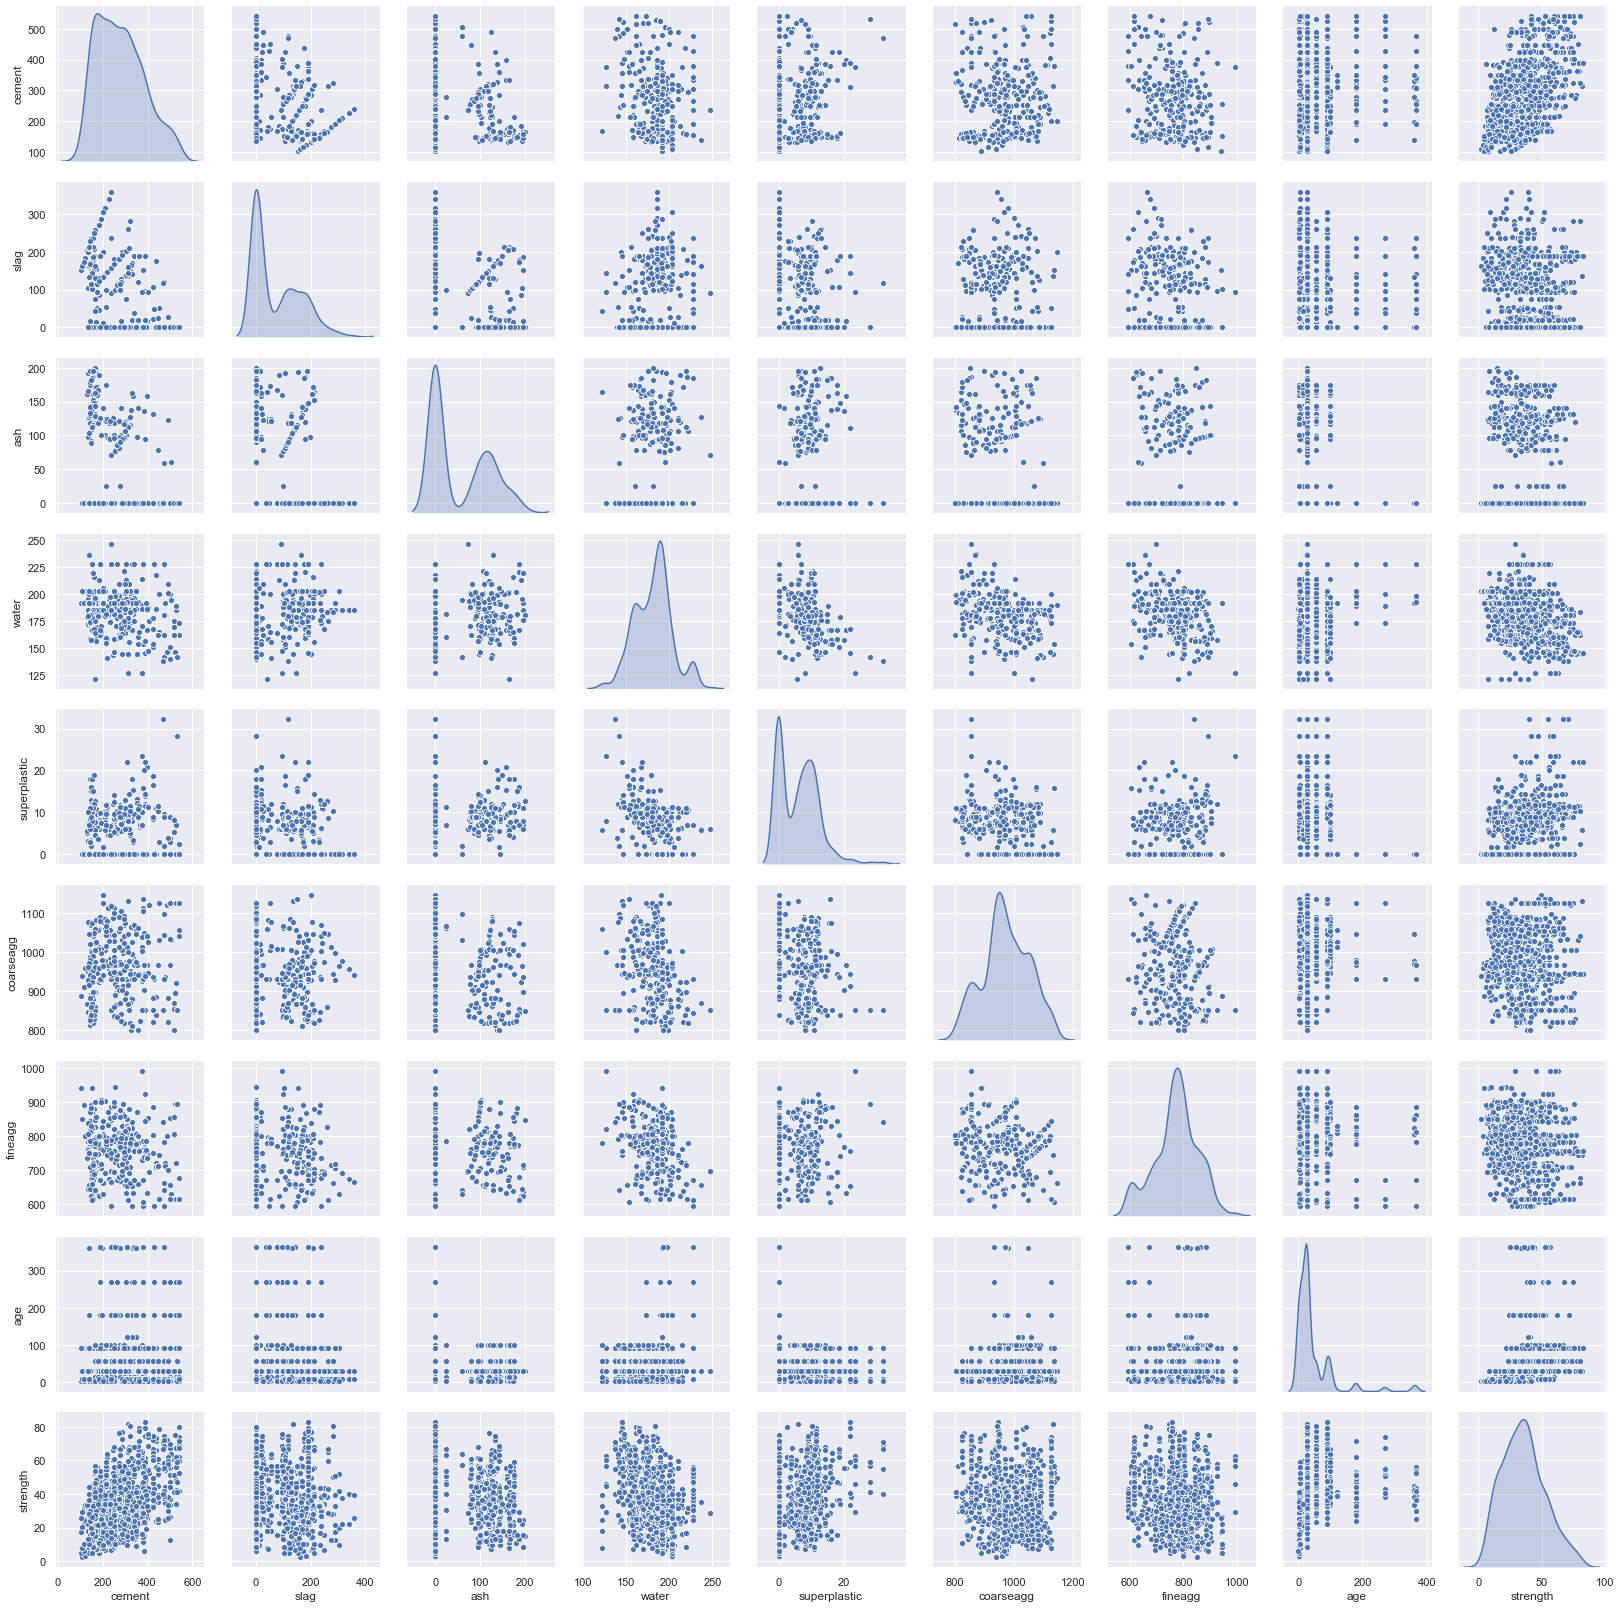

In [364]:
sns.pairplot(Concrete_Data,diag_kind='kde')

**Relationships observed in this part of the Exploratory Data Analytics [EDA]:**
- The water to cement ratio is inversely related to strength.  
- The strongest mixtures have the least amounts of water.  
- The strengthening of concrete is inversly related to strength over time after a ideal period of about 28 days and the appears to completely harden in about 100 days.
- A little bit of plasticizer helps make strong concrete more consistently, but too much will weaken the mixture
- The mixtures with the least fly ash were strongest.  It appears to impede strength.

Each of the optional additives seems to play a role in determining the strength of the resultant concrete. Plasticizer and Slag seem to improve the strength in the right concentrations, but if too much is added, they impair the strength of the mixture.  Fly ash seems to weaken the mixture if any is added in a plasticizer mixture.

**Most important variable relationship identified:**

The key factor in the strength of a concrete mixture is to keep the water to cement ratio on the low side. Even without any additives many dry concrete mixtures are among the strongest mixtures in the population.

## FEATURE ENGINEERING

Our data seems to be already very informative and complete, there are minimal data challenges as data pollution and missing values do not appear to be an issue with the concrete data set. The analysis did reveal outliers that have the potential to cause havoc for my model and thus must be addressed.

**Strategies to address Outliers data challenges:**
- Outliers in the data should be dropped or alternatively corrected. 
- Outliers may however provide useful information for exploratory analytics

**Linear Model built on original raw data** 

In [365]:
from scipy.stats import zscore

Concrete_df_attr = Concrete_Data.loc[:, 'cement':'strength']
Concrete_df_attr_z = Concrete_df_attr.apply(zscore)

array = Concrete_df_attr_z.values
X = array[:,0:8] # select all rows and first 7 columns which are the attributes
y = array[:,8]   # 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [366]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [367]:
y_pred = clr.predict(X_test)

In [368]:
clr.score(X_test, y_test)

0.8294475793675959

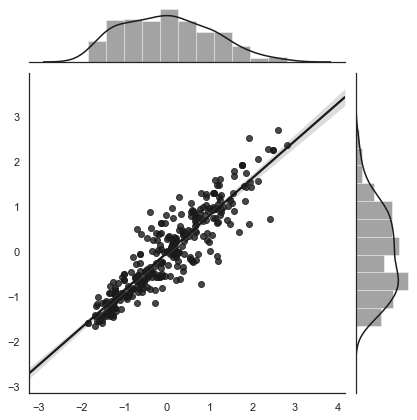

In [369]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [370]:
regression_model = LinearRegression() 
regression_model.fit(X_train, y_train)

regression_model.score(X_test, y_test)

0.6339136715208276

## K Means Clustering

In [371]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Concrete_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:18]

,num_clusters,cluster_errors
0,2,3.147316e+07
1,3,2.499578e+07
2,4,2.198953e+07
3,5,1.982108e+07


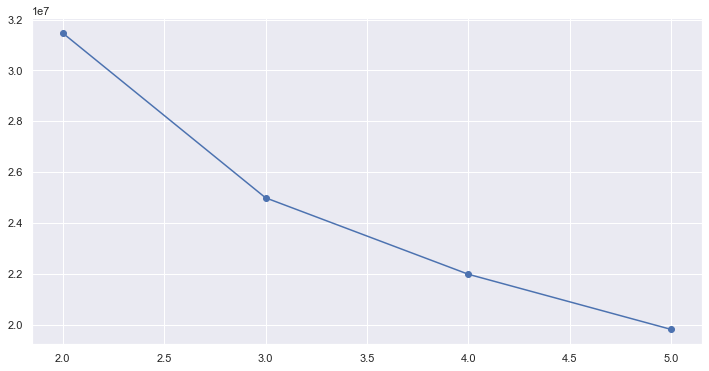

In [372]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [373]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

Concerte_df_attr = Concrete_Data.loc[:, 'cement':'strength']
Concrete_df_attr_z = Concrete_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(Concrete_df_attr_z)

prediction=cluster.predict(Concrete_df_attr_z)
Concrete_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

Concrete_df_attr_z_copy = Concrete_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [374]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.0536293 ,  0.1315908 , -0.79630495,  0.69179239, -0.87820168,
         0.25003637, -0.26851662,  0.24548169, -0.35620758],
       [-0.62375205, -0.42230513,  1.14094855, -0.29432634,  0.41340669,
         0.10321448,  0.23292867, -0.16690295, -0.24295822],
       [ 0.97789238,  0.47282031, -0.40192412, -0.8623689 ,  1.02559721,
        -0.67607356,  0.12838409, -0.19741904,  1.1299039 ]])

In [375]:
centroid_df = pd.DataFrame(centroids, columns = list(Concrete_df_attr) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.053629,0.131591,-0.796305,0.691792,-0.878202,0.250036,-0.268517,0.245482,-0.356208
1,-0.623752,-0.422305,1.140949,-0.294326,0.413407,0.103214,0.232929,-0.166903,-0.242958
2,0.977892,0.472820,-0.401924,-0.862369,1.025597,-0.676074,0.128384,-0.197419,1.129904


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025394E1D788>,
      dtype=object)

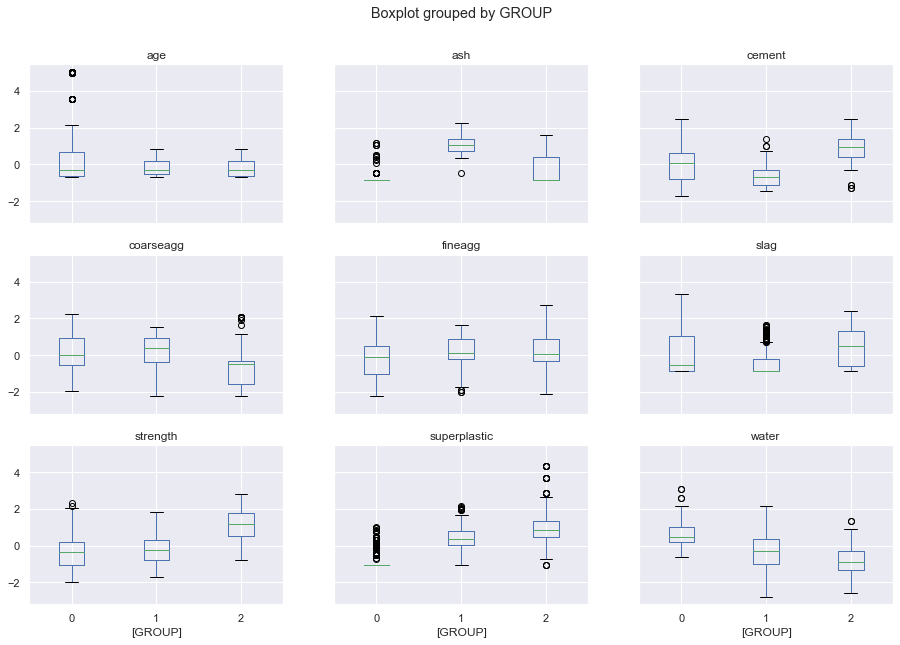

In [376]:
import matplotlib.pylab as plt

Concrete_df_attr_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

There are many outliers on each dimension  (indicated by the black circles). The range of data indicated by the whiskers is long ... due to the outliers)

The outliers must be addressed, below we will proceeed to employ methods for handling outliers. 

## Identifying and handling outliers

In [377]:
# Addressing outliers at group level

data = Concrete_df_attr_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(Concrete_df_attr_z['GROUP']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [378]:
data_corrected.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,0.488793,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,-1.039143,0.958372,-0.959363,-0.279733,-1.049727


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253FFD8FB08>,
      dtype=object)

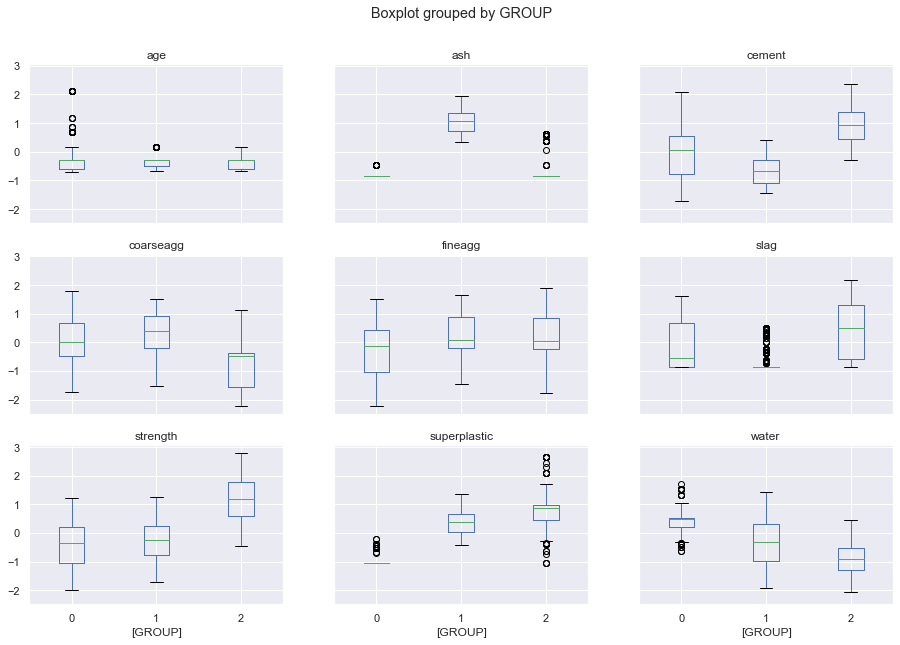

In [379]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(15, 10))

**Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them**

## Let us analyze the strength data field column vs other columns group wise

**Strength vs Water**

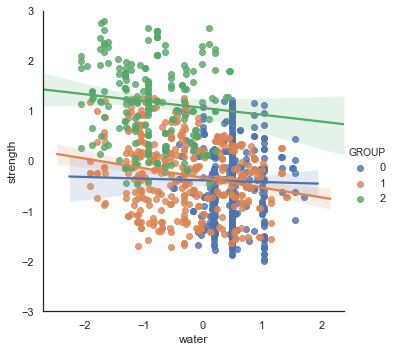

In [384]:
# Strength Vs Water

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

**Strength vs Age**

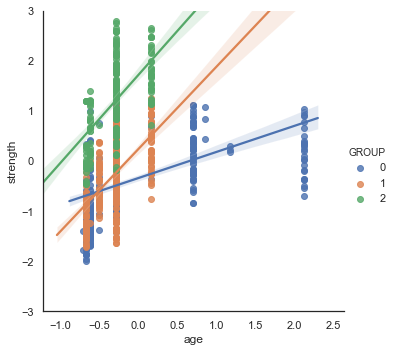

In [385]:
# Strength Vs Age

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

**Strength vs Coarseagg**

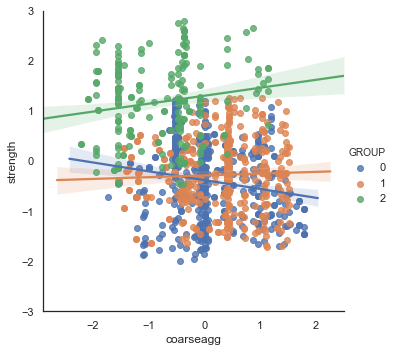

In [386]:
# Strength Vs 'coarseagg'

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

**Strength vs fineagg**

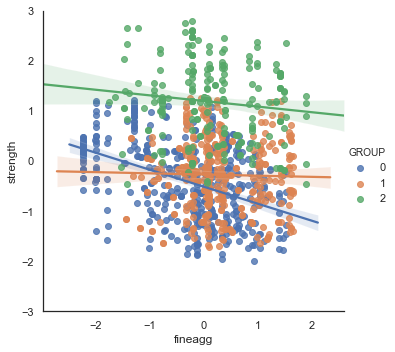

In [387]:
# Strength Vs 'fineagg'

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

**Strength vs slag**

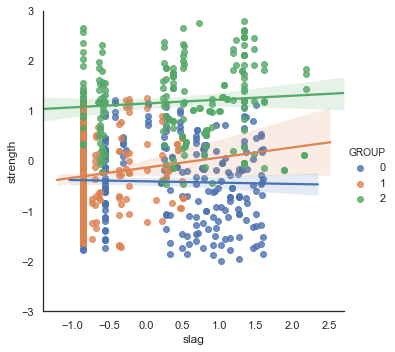

In [388]:
# Strength Vs 'slag'

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

**Strength vs cenement**

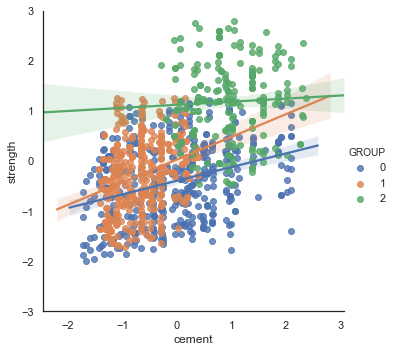

In [389]:
# Strength Vs 'cement'

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

**Strength vs 'superplastic'**

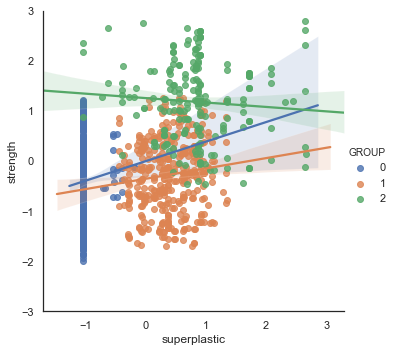

In [390]:
# Strength Vs 'superplastic'

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

## DecisionTree Regression

In [391]:
dTreeR = DecisionTreeRegressor(random_state=0, max_depth=3)
dTreeR.fit(X_train, y_train)

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Feature Importance"], index=feature_names))

              Feature Importance
slag                    0.363596
ash                     0.000000
water                   0.000000
superplastic            0.127460
coarseagg               0.109738
fineagg                 0.000000
age                     0.032436
strength                0.366769


**Note the importance of feature importance of the data for the model. We can attempt to drop non important data fields to improve the performance of the model:

In [392]:
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.629572211910627
0.561936737440953


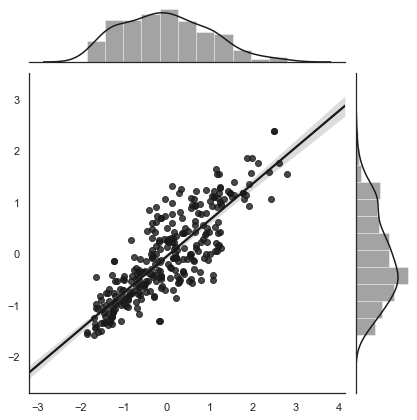

In [393]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

##  ITERATION 2 

In [394]:
# 1. Drop acc column based on the above visual analysis

X = Concrete_df_attr_z.drop( ['fineagg','ash'] , axis=1)
y = Concrete_df_attr_z['strength']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [395]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

              Imp
cement        0.0
slag          0.0
water         0.0
superplastic  0.0
coarseagg     0.0
age           0.0
strength      1.0
GROUP         0.0


In [396]:
dTreeR = DecisionTreeRegressor(random_state=0, max_depth=3)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))
print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

0.9756502973255395
0.9728465978284456
              Imp
cement        0.0
slag          0.0
water         0.0
superplastic  0.0
coarseagg     0.0
age           0.0
strength      1.0
GROUP         0.0


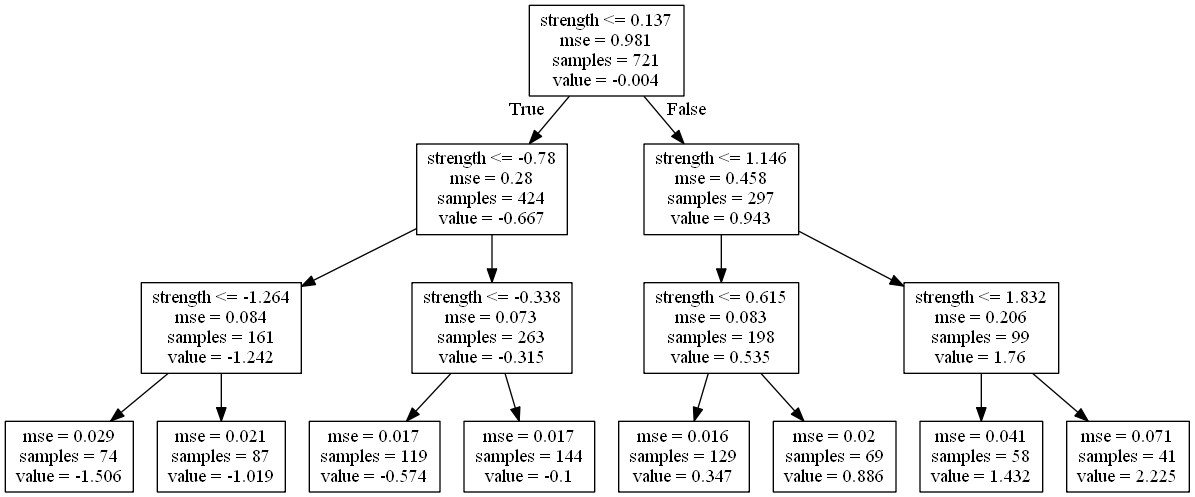

In [397]:
train_char_label = ['No', 'Yes']
Concrete_Data_Tree_FileR = open('Concrete_Data_Tree_FileR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Concrete_Data_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Concrete_Data_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Concrete_Data_Tree_FileR.dot -o Concrete_Data_Tree_FileR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Concrete_Data_Tree_FileR.png"))

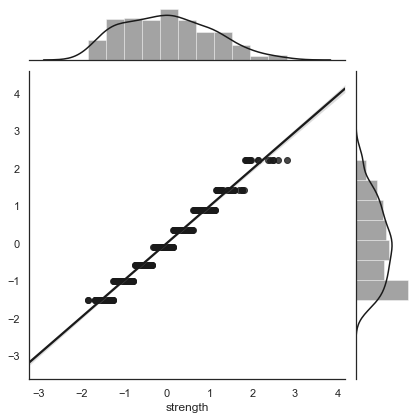

In [398]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

# HYPERPARAMETER TUNING  

**Now we will tune the key hyper parameters availiable in order to achieve the optimal performance for our model**

max_features :
- It defines the maximum number of features allowed for the split in each decision tree.
- Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.

max_depth:
- This parameter defines the maximum depth of the trees.

min_samples_split:
- Used to define the minimum number of samples required in a leaf node before a split is attempted.
- If the number of samples is less than the required number, the node is not split.

min_samples_leaf:
- This defines the minimum number of samples required to be at a leaf node.
- Smaller leaf size makes the model more prone to capturing noise in train data.

random_state:
- This parameter is used to define the random selection.
- It is used for comparison between various models.

In [399]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time

## RandomizedSearchCV_GridSearchCV

In [400]:
clf = dTreeR

In [401]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 6),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),}

In [402]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [403]:
randomCV.fit(X, y)

print(randomCV.best_params_)

{'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [404]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 5],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf": [1, 3, 10],}

In [405]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, None], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             pre_disp

In [406]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [407]:
grid_search.cv_results_['mean_test_score']

array([0.39964978, 0.39964978, 0.39964978, 0.39964978, 0.39964978,
       0.39964978, 0.39929587, 0.39929587, 0.39929587, 0.78411154,
       0.78411154, 0.78411154, 0.78411154, 0.78411154, 0.78411154,
       0.78238433, 0.78238433, 0.78238433, 0.77952241, 0.77952241,
       0.77952241, 0.77952241, 0.77952241, 0.77952241, 0.77865891,
       0.77865891, 0.77865891, 0.84080267, 0.80770761, 0.77083141,
       0.79699634, 0.79699634, 0.79179043, 0.7565    , 0.7565    ,
       0.7565    , 0.96251961, 0.93765036, 0.94836276, 0.94380634,
       0.94380634, 0.94353583, 0.940341  , 0.940341  , 0.940341  ,
       0.98275642, 0.98685392, 0.9760399 , 0.98968123, 0.98968123,
       0.97938633, 0.9593407 , 0.9593407 , 0.9593407 ])

In [408]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [409]:
dTreeR = DecisionTreeRegressor(random_state=0, max_depth=None, max_features=5,max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, splitter='best')
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

0.9959421943546695


# ALTERNATIVE MODEL SELECTIONS 

In [410]:
Concrete_Data_Adj = Concrete_Data

In [411]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = Concrete_Data_Adj.drop('strength', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = Concrete_Data_Adj[['strength']]

In [412]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

## SIMPLE LINEAR MODEL

In [414]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7917080306678764
The coefficient for slag is 0.5620608749496471
The coefficient for ash is 0.3474767710263217
The coefficient for water is -0.13186138372514813
The coefficient for superplastic is 0.13449876840644548
The coefficient for coarseagg is 0.11183689241537606
The coefficient for fineagg is 0.17370080312287423
The coefficient for age is 0.4175909779025138


In [415]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6031487540630229
0.6339136715208273


## CREATE A REGULARIZED RIDGE MODEL AN NOTE THE COEFFIENTS

In [416]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.78652136  0.55696657  0.34291358 -0.13534196  0.13450497  0.10831507
   0.16918324  0.41713594]]


In [417]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6031447909390979
0.6340333563625516


## LASSO MODEL

In [418]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]


In [419]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5215627623725142
0.51856614888699


# Fit a simple non regularized linear model on poly features-

In [420]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 0.79170803  0.56206087  0.34747677 -0.13186138  0.13449877  0.11183689
  0.1737008   0.41759098]


In [421]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.78652136  0.55696657  0.34291358 -0.13534196  0.13450497  0.10831507
   0.16918324  0.41713594]]


In [422]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6031447909390979
0.6340333563625516


In [423]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.61055694  0.38144461  0.18267793 -0.24052525  0.13851511 -0.
  0.0140494   0.39373687]


In [424]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5978536903761617
0.6334948994344665
